#                                            Assigmnet 1




## Part A

### Calculation of Token-Type ratio 

In [4]:
"""
    Reading txt file
"""
import nltk
from nltk import sent_tokenize
f = f = open("text.txt", "r",encoding="utf8")
text = f.read()
f.close()
sentences = sent_tokenize(text)
#print(type(sentences))

### Explanation

In order to calculate the token-type ratio I have used **NLTK** library. First I have seperated the full text into a list of sentences to avoid memory issue. Then **"token_dict"** contains (token : frequency) key-value pairs. At lot of places the text contain **"--"** and **"_"** character so I replaced it with a space " <space>". Then I have used **TweetTokenizer()** to tokenize each sentence. I have used **TweetTokenizer()** to preserve word like "you'll", "didn't" ,"He's". In other words I have not expanded the contractions. 

## Note:
### The following calulation doesn't convert text to the lower-case.
### Part B contain the solution where i Have converted the text to lower-case

In [5]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
import string
tknzr = TweetTokenizer()

# this variable stores the total number of the Tokens
total_number = 0    

#This stores token as key and thier frequency as value
token_dict = dict()

for line in sentences:
  
  # replacing '--' with <space>
  line = line.replace("--", " ")

  # replacing '_' with <spaces>
  line = line.replace("_"," ")

  # Tweet Tokenizing using NLTK
  tokens = tknzr.tokenize(line)
  
  for token in tokens:

    """ 
      This condition is used to preserve word with apostrophe
      Example: you'll will remain you'll.
                     but puctuatoin like: ?,.,; will be filtered out.
    """
    if not token.isalpha() and len(token)<2:
      continue
    total_number+=1
    
    if token in token_dict:
      token_dict[token]+=1
    else:
      token_dict[token] = 1

#Sorting the dictionary based on their frequencies.
sorted_dict = sorted(token_dict.items(), key=lambda item: item[1], reverse = True)
#print(f"Sorted dictionary's list:\n {sorted_dict}")
sorted_dict_copy = sorted_dict
import copy
total_number_copy = copy.deepcopy(total_number)
print(f"Token-type ratio = {total_number/len(token_dict)}")

Token-type ratio = 8.715186742517933


### Observed Token-Type ratio = 8.7 

## Five most frequent words

In [6]:
from prettytable import PrettyTable
t = PrettyTable(['Word', 'Frequency (f)','Rank (r)','f.r'])

for i,item in enumerate(sorted_dict):
  t.add_row([item[0],item[1],i+1,(i+1)*item[1]])
  if i==9:
    break
print(t)


+------+---------------+----------+------+
| Word | Frequency (f) | Rank (r) | f.r  |
+------+---------------+----------+------+
| the  |      3323     |    1     | 3323 |
| and  |      2943     |    2     | 5886 |
|  a   |      1754     |    3     | 5262 |
|  to  |      1704     |    4     | 6816 |
|  of  |      1418     |    5     | 7090 |
| was  |      1163     |    6     | 6978 |
|  it  |      1023     |    7     | 7161 |
|  in  |      902      |    8     | 7216 |
| that |      874      |    9     | 7866 |
|  he  |      874      |    10    | 8740 |
+------+---------------+----------+------+


## Observation
    the    3323     determiner (article)
    and    2943     conjunction
    a        1754     determiner
    to      1704      preposition, verbal infinitive marker
    of      1418     preposition
    was    1163      auxiliary verb
    it       1023     (personal/expletive) pronoun
    in       902      preposition
    that   874      complementizer, demonstrative
    he      874      (personal) pronoun

These are the most frequent word. these observations are very simillar to the table 1.1 given in the reading material. 
One point to note here is that words with length ~ 3,2 are most frequent. 



## Ploting Rank vs Frequency

Text(0.5, 1.0, 'Frequency vs Rank ')

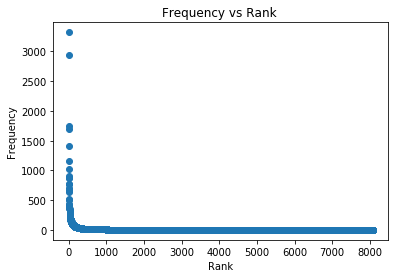

In [7]:
import matplotlib.pyplot as plt
import numpy
ranks = [i for i in range(1,len(sorted_dict)+1)]
frequencys = [ item[1] for item in sorted_dict]
#print(len(ranks))
#print(frequencys)
plt.scatter(ranks,frequencys)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title("Frequency vs Rank ")


## Ploting log10(Rank) vs log10(Frequency)

Text(0.5, 1.0, 'Frequency vs Rank (Log10 Scale)')

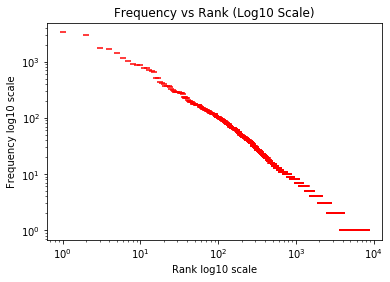

In [8]:
plt.scatter(ranks,frequencys,marker="_",color='red')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Rank log10 scale')
plt.ylabel('Frequency log10 scale')
plt.title("Frequency vs Rank (Log10 Scale)")


## Pearson's Coefficient

In [9]:
from scipy.stats import pearsonr 
corr,x = pearsonr(ranks,frequencys)

In [10]:
print(f"Pearsons coefficient of correletion between rank and frequency is {corr}")

Pearsons coefficient of correletion between rank and frequency is -0.175727476333628


# Part B


## Class 1: Words

### Note: All words in the following code are converted to the lowercase 
That means "The" is same as "the"

In [11]:
f = f = open("text.txt", "r",encoding="utf8")
text = f.read()
f.close()
sentences = sent_tokenize(text)

from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
import string
tknzr = TweetTokenizer()

# this variable stores the total number of the Tokens
total_number = 0    

#This stores token as key and thier frequency as value
token_dict = dict()

for line in sentences:
  
  # replacing '--' with <space>
  line = line.lower()
  line = line.replace("--", " ")

  # replacing '_' with <spaces>
  line = line.replace("_"," ")

  # Tweet Tokenizing using NLTK
  tokens = tknzr.tokenize(line)
  
  for token in tokens:

    """ 
      This condition is used to preserve word with apostrophe
      Example: you'll will remain you'll.
                     but puctuatoin like: ?,.,; will be filtered out.
    """
    if not token.isalpha() and len(token)<2:
      continue
    total_number+=1
    
    if token in token_dict:
      token_dict[token]+=1
    else:
      token_dict[token] = 1

#Sorting the dictionary based on their frequencies.
sorted_dict = sorted(token_dict.items(), key=lambda item: item[1], reverse = True)
#print(f"Sorted dictionary's list:\n {sorted_dict}")

#print(f"Token-type ratio = {total_number/len(token_dict)}")

## Frequency table

In [12]:
from prettytable import PrettyTable
t = PrettyTable(['Word', 'Frequency (f)','Rank (r)','f.r'])

for i,item in enumerate(sorted_dict):
  t.add_row([item[0],item[1],i+1,(i+1)*item[1]])
  if i==4:
    break
print(t)


+------+---------------+----------+------+
| Word | Frequency (f) | Rank (r) | f.r  |
+------+---------------+----------+------+
| the  |      3697     |    1     | 3697 |
| and  |      3083     |    2     | 6166 |
|  a   |      1824     |    3     | 5472 |
|  to  |      1707     |    4     | 6828 |
|  of  |      1426     |    5     | 7130 |
+------+---------------+----------+------+


## Observation
The frequencies of the each word has been increased due to the fact that, Previously we are considering **"The"** and **"the"** as two different tokens but here, since we have converted the whole text into lower case both **"The"** and **"the"** are considered as a single token.

    -But the order of frequencies remains the same atleast for the first 5 words

## Ploting Rank vs Frequency

Text(0, 0.5, 'Frequency')

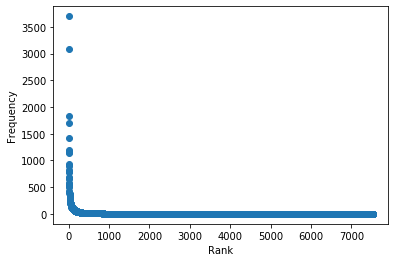

In [13]:
import matplotlib.pyplot as plt
import numpy
ranks = [i for i in range(1,len(sorted_dict)+1)]
frequencys = [ item[1] for item in sorted_dict]
#print(len(ranks))
#print(frequencys)
plt.scatter(ranks,frequencys)
plt.xlabel('Rank')
plt.ylabel('Frequency')


## Ploting log10(Rank) vs log10(Frequency)

Text(0, 0.5, 'Frequency log10 scale')

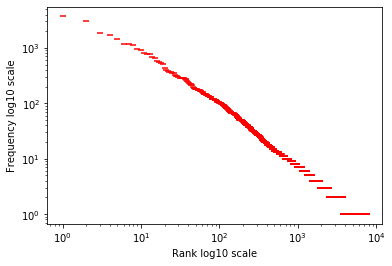

In [14]:
plt.scatter(ranks,frequencys,marker="_",color='red')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Rank log10 scale')
plt.ylabel('Frequency log10 scale')


## Finding Pearson's coefficient

I have used **"pearsonr()"** function to calulate Pearson Coefficient.

    *The Pearson correlation coefficient measures the linear relationship between two datasets.

In [15]:
from scipy.stats import pearsonr 
corr,x = pearsonr(frequencys,ranks)
print(f"Pearsons coefficient of correletion between rank and frequency is {corr}")

Pearsons coefficient of correletion between rank and frequency is -0.17241236988574346


### Pearson's Coefficient = -0.17
Negative correlations imply that as **frequency increases**, **rank decreases**, which matches with our observations and also with zipf's law

## Considering the letters

In [16]:
import string
letter_dict=dict()
#print(type(text))
total_letter=0
for letter in text:
    letter = letter.lower()
    if letter.isalpha():
        total_letter+=1
        if letter in letter_dict:
            letter_dict[letter]+=1
        else:
            letter_dict[letter] = 1
letter_sorted_dict = sorted(letter_dict.items(), key=lambda item: item[1], reverse = True)


## Frequency Table

In [17]:
from prettytable import PrettyTable
t = PrettyTable(['Word', 'Frequency (f)','Rank (r)','f.r'])

for i,item in enumerate(letter_sorted_dict):
  t.add_row([item[0],item[1],i+1,(i+1)*item[1]])
  if i==4:
    break
print(t)


+------+---------------+----------+--------+
| Word | Frequency (f) | Rank (r) |  f.r   |
+------+---------------+----------+--------+
|  e   |     35536     |    1     | 35536  |
|  t   |     28761     |    2     | 57522  |
|  a   |     23443     |    3     | 70329  |
|  o   |     23141     |    4     | 92564  |
|  n   |     20114     |    5     | 100570 |
+------+---------------+----------+--------+


## Observation

**3 out of 5** most frequent letter are vowels. 
    
    ->  "e" and "t" are the highest because word "the" was also highest and it contains both e and t. 
    ->  "and" was also among the frequent word that'why  "a" and "n" is also among the most frequent letter

## Ploting Rank vs Frequency

26


Text(0, 0.5, 'Frequency')

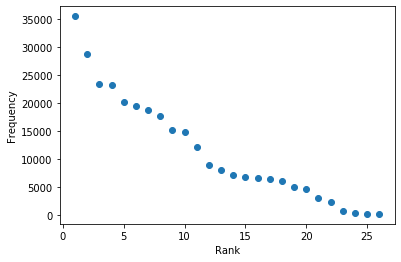

In [18]:
import matplotlib.pyplot as plt
import numpy
ranks = [i for i in range(1,len(letter_sorted_dict)+1)]
frequencys = [ item[1] for item in letter_sorted_dict]
print(len(ranks))
#print(frequencys)
plt.scatter(ranks,frequencys)
plt.xlabel('Rank')
plt.ylabel('Frequency')

## Ploting log10(Rank) vs log10(Frequency)

'\nfor i, item in enumerate(letter_sorted_dict):\n    plt.annotate(item[0], (ranks[i], frequencys[i]))\n'

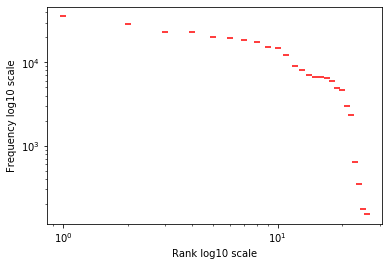

In [19]:
plt.scatter(ranks,frequencys,marker="_",color='red')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Rank log10 scale')
plt.ylabel('Frequency log10 scale')

# If you want to see which position of each letter 
# on the grap uncomment the following code

"""
for i, item in enumerate(letter_sorted_dict):
    plt.annotate(item[0], (ranks[i], frequencys[i]))
"""

## Finding Pearson's coefficient

I have used **"pearsonr()"** function to calulate Pearson Coefficient.

    *The Pearson correlation coefficient measures the linear relationship between two datasets.

In [20]:
from scipy.stats import pearsonr 
corr,x = pearsonr(ranks,frequencys)
print(f"Pearsons coefficient of correletion between rank and frequency is {corr}")

Pearsons coefficient of correletion between rank and frequency is -0.956722990127705


## Pearson's coefficient = -0.95

This indicates as rank increases the frequency decreases sharply

## Part C


Before getting to the final conclusion let's do some more analysis. Starting from plotting **Frequency vs letters** 

26
('z', 151)


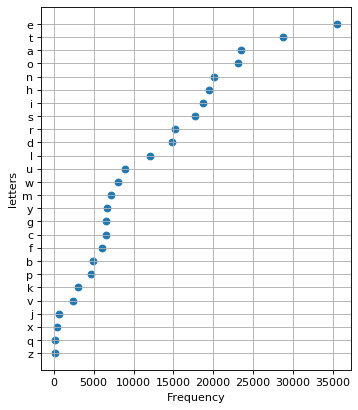

In [110]:
import matplotlib.pyplot as plt
import numpy
from matplotlib.pyplot import figure
figure(num=None, figsize=(5, 6), dpi=80, facecolor='w', edgecolor='k')
ranks = [i[0] for i in reversed(letter_sorted_dict)]
frequencys = [ item[1] for item in reversed(letter_sorted_dict)]
print(len(ranks))
#print(frequencys)


plt.grid()
plt.scatter(frequencys,ranks)
plt.xlabel('Frequency')
plt.ylabel('letters')

print(max(letter_sorted_dict))


# What %age of the text consist of vowels

In [108]:
t = PrettyTable(['Word', 'Frequency (f) ','Rank (r)','f.r','frequency %age'])
vowels = ["a","e","i","o","u"]
percent= 0
for i,item in enumerate(letter_sorted_dict):
  if item[0] in vowels:   
      t.add_row([item[0],item[1],i+1,(i+1)*item[1],item[1]/(total_letter)*100])
      percent += item[1]/(total_letter)*100
        
  if i==26:
    break
print(t)
print(" Vowels contains {:.2f} % of the text" .format(percent))
#print((total_number_copy))

+------+----------------+----------+--------+--------------------+
| Word | Frequency (f)  | Rank (r) |  f.r   |   frequency %age   |
+------+----------------+----------+--------+--------------------+
|  e   |     35536      |    1     | 35536  | 12.032763682291154 |
|  a   |     23443      |    3     | 70329  | 7.937980611322365  |
|  o   |     23141      |    4     | 92564  | 7.835721082054807  |
|  i   |     18781      |    7     | 131467 | 6.359391454218544  |
|  u   |      8927      |    12    | 107124 | 3.0227510522234673 |
+------+----------------+----------+--------+--------------------+
 Vowels contains 37.19 % of the text


## Confirming zipf's law  
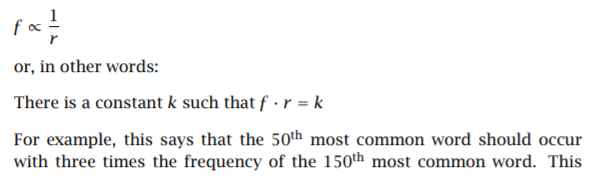

 In order to confirm the above example I have created a list1 which have frequency of word in sorted order with interval of 10.
 Then I have a list2 which have frequency of 3 times the (i+30)th element.
 Then I have ploted the two list on the same graph to check weather these two lines(lists) fits each other or not

In [69]:
freq1=[]
freq2 = []
for i in range(0,len(sorted_dict)-30,10):
    #print(sorted_dict[i])
    freq1.append(sorted_dict[i][1])
    
    freq2.append((sorted_dict[i+30][1])*3)
    #print(sorted_dict[i+30])
    #print(freq2)


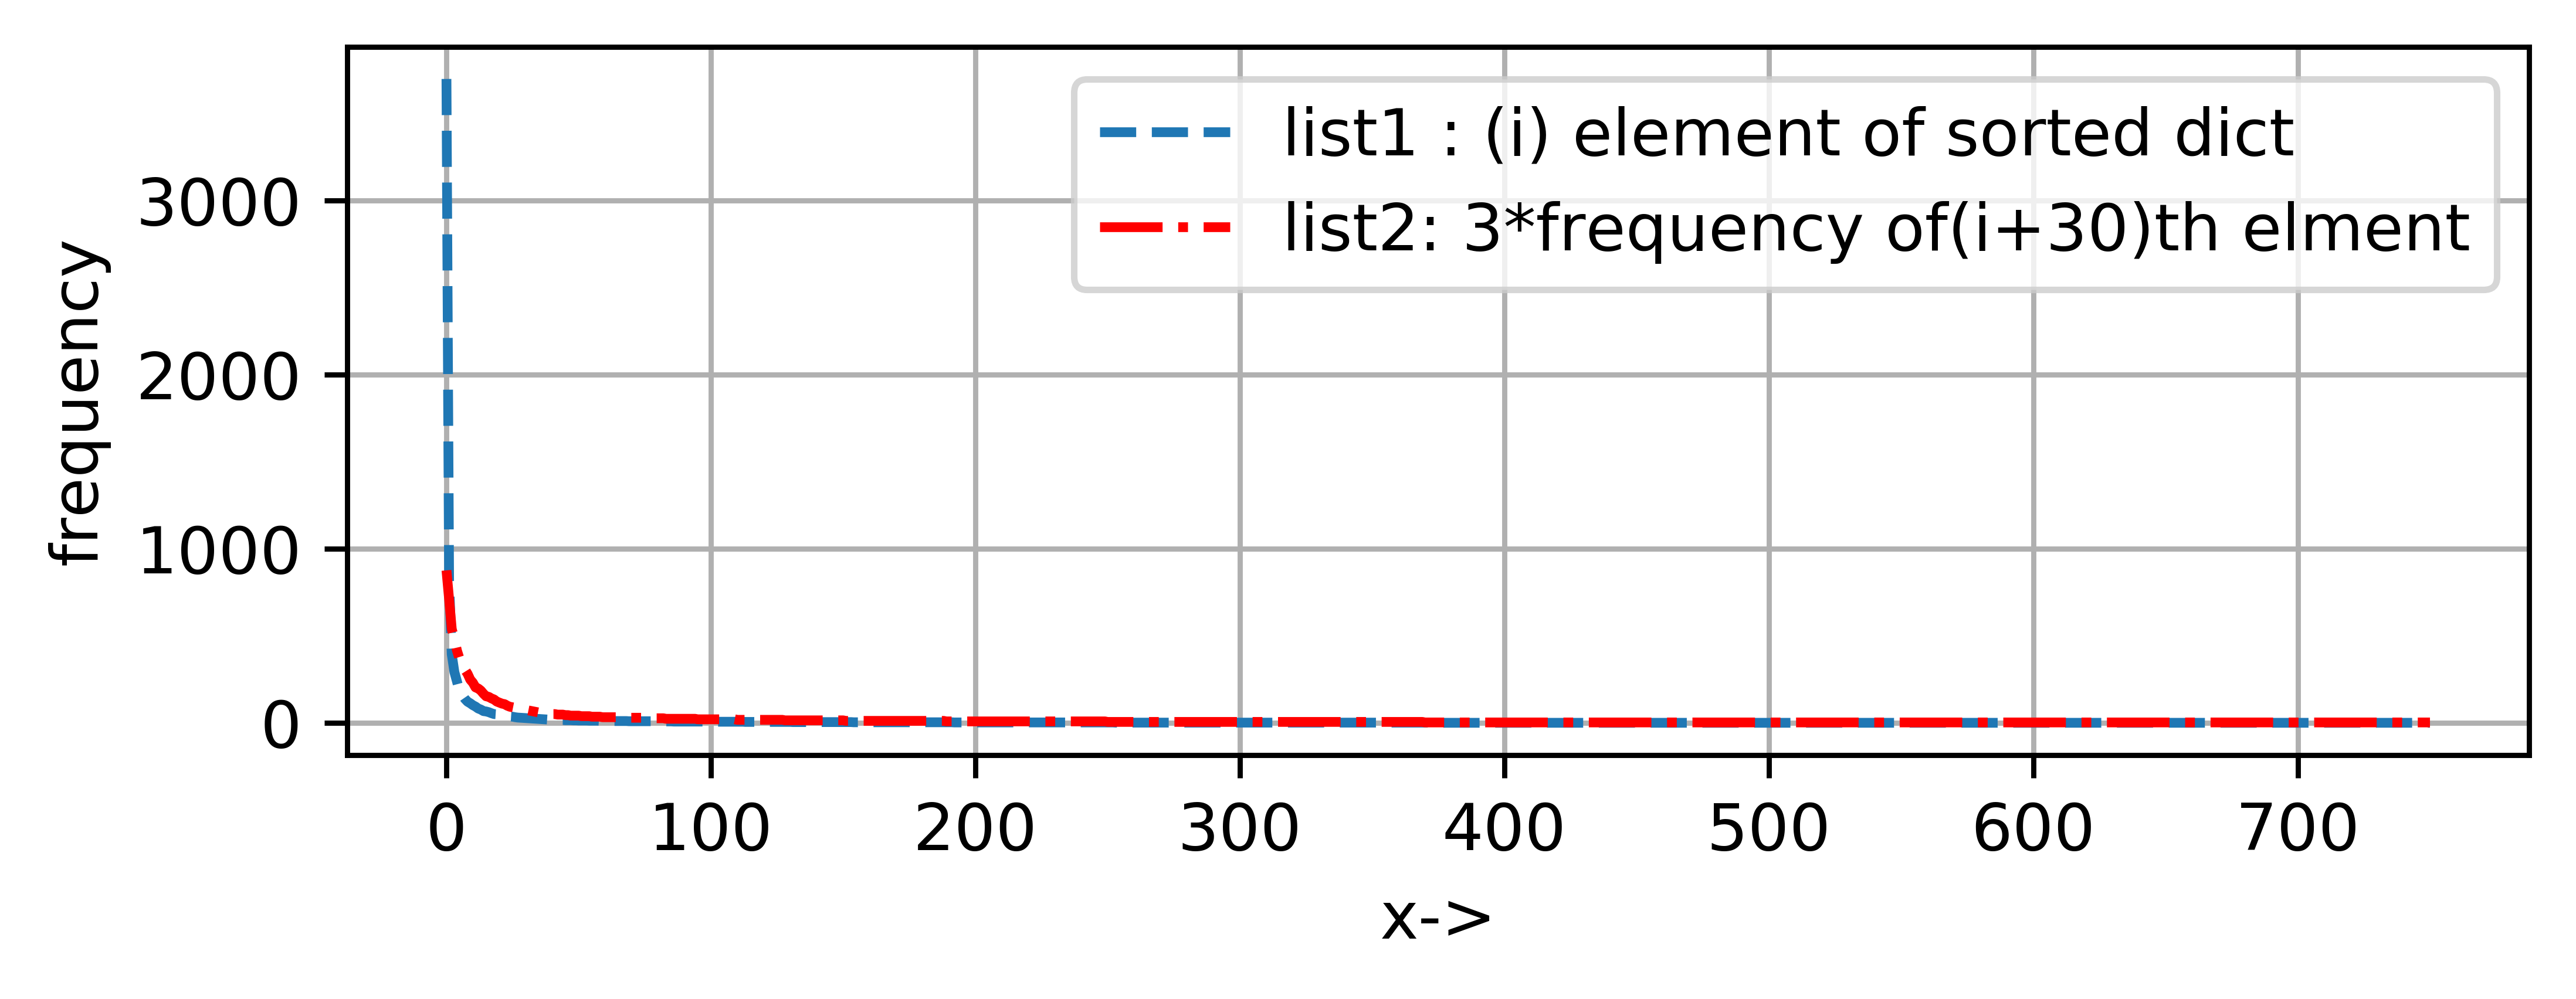

In [96]:
figure(num=None, figsize=(6, 2), dpi=800, facecolor='w', edgecolor='k')
plt.plot(freq1,label='list1 : (i) element of sorted dict',linestyle='--',marker="")
plt.plot(freq2,label='list2: 3*frequency of(i+30)th elment',linestyle='-.',color='r')
plt.ylabel("frequency")
plt.xlabel('x->')
plt.legend()
plt.grid()
plt.show()


# Conclusion

    -> Nearly 37% of the text comprises of Vowels.
    -> Distribution of the letter is different from the distribution of the words. The distributution of letter buldges out more than the distribution of the Lettes.They reasons for this may be there are around ~ 70000 word but there are only 26 alphabets.
    
    -> "e" and "t" have the highest frequency because word "the" also had highest frequency and it contains both e and t. 
    ->  "and" was also among the frequent word that's why  "a" and "n" is also among the most frequent letter
    -> zipf's law is not an exact fit for the frequency and rank relation. According to the Zipf's law a straight line is the best fit for log(frequency) and log(rank), as per the observation from the above, a parabola can be a good fit.  
    
    